## Examen Primer Parcial - Visión para robots
---

#### **Instrucciones** 

1. Lee el notebook completo antes de iniciar.
2. Contesta las celdas de preguntas directamente en el notebook.
3. Para las partes de código, agrega todas las celdas de código que consideres necesarias.
4. El notebook se entrega en Canvas. **Garantiza que hayas ejecutado todas las celdas de código antes de subirlo.**

### Preguntas de desarrollo (5 puntos cada una)
---

Agrega una celda de texto nueva con las respuestas.

1. Se tiene una imagen RGB de 512 de ancho, y 324 de alto. ¿Cuántos pixeles totales tiene la imagen?
2. Describe qué es un espacio de color. ¿Cuál es la diferencia entre el espacio HSV y RGB?
3. ¿Qué son, para qué sirven, y cómo se representan los filtros?
4. Busca dos imágenes en línea: una que sea principalmente de alta frecuencia, y otra que sea de baja frecuencia. Carga las dos imágenes al notebook en un mismo subplot, y describe cuál es la diferencia entre una imagen con alta frecuencia, y otra con baja frecuencia.
5. ¿Qué son las operaciones morfológicas? ¿Cuál es la diferencia entre open, close, dilate, y erode?

### Respuestas 
1. La imagen tiene en total 165,888 pixeles. 

2. Un espacio de color es un modelo que describe el rango de colores como una tupla de números. El espacio de color es un método muy útil puesto que nos enseña la forma en que se organizan los colores, y de esta forma representa lo que una cámara puede ver, lo que un monitor muestra o lo que una impresora puede imprimir. Existen una variedad de espacios de color, unos ejemplos de esto siendo RGB, HSV y HLS. 
La principal diferencia entre HSV y RGB es que el HSV es una representación alternativa del RGB, donde en HSV se enfoca más en valores como la saturación (que tanto llega al blanco), el value (que tan oscuro está) y el hue (el color que se tiene) mientras que RGB no se fija en estos aspectos, simplemente en el nivel de rojo, azul y verde que se tiene en las imágenes. 

3. Un filtro es un método que nos ayuda a resaltar y eliminar todo aquella información que nos parezca o no relevante en una imagen. Los filtros se representan por matrices.

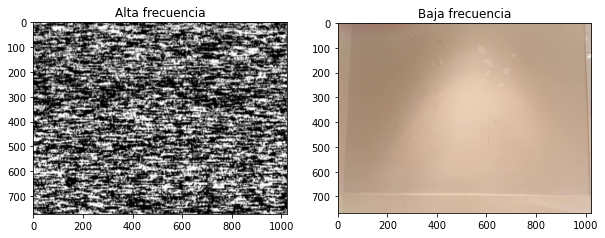

In [404]:
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline

uno = cv2.imread("images/ruido-blanco.jpg")
uno = cv2.cvtColor(uno, cv2.COLOR_BGR2RGB)

dos = cv2.imread("images/pared.jpg")
dos = cv2.cvtColor(dos, cv2.COLOR_BGR2RGB)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
ax1.set_title("Alta frecuencia")
ax1.imshow(uno)
ax2.set_title("Baja frecuencia")
ax2.imshow(dos)

4. Los filtros de pasa-alta son aquellos que nos ayudan a contrastar y hacer más nitida una imagen, y mejora las partes de alta frecuencia, mientras que los filtros de pasa-baja quitan de la imagen áreas de alta frecuencia (ruido), como un blur o degradado. Como podemos ver en las arriba, se escogió una imagen de ruido blanco en la televisión como la de alta frecuencia, que tiene muchas zonas donde la intensidad cambia mucho, mientras que en la imagen de baja frecuencia tenemos a una pared, donde vemos que la intensidad se mantiene igual o no cambia tan drásticamente como lo hace en la imagen de alta frecuencia.

5. Las operaciones morfológicas simplifican las imágenes y conservan las principales características de forma de los objetos. Primero tenemos a la dilatación, que amplia las zonas luminosas y con brillo en una imagen (agregando pixeles), mientras que la erosión hace exactamente lo contrario, elimina pixeles a lo largo de los límites de los objetos y los reduce. Estas operaciones pueden ser combinadas para tener otros resultados, una combinación es opening, que tiene primero a la erosión y luego a la dilatación para reducir el ruido de una imagen, otra es closing que es lo contrario, primero la dilatación y luego la erosión que es útil para cerrar pequeños hoyos o áreas oscuras en un objeto.

### Preguntas de código
---

Imports básicos y ruta de las imágenes de prueba.

In [1]:
import cv2 

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

image_dir = "images/license_plates"

#### Ejercicio 1 (15 puntos)

Crea una imagen de 21 por 21 pixeles, y agrega el código necesario para crear y mostrar el siguiente resultado:

![Examen 1](images/ex1.png)

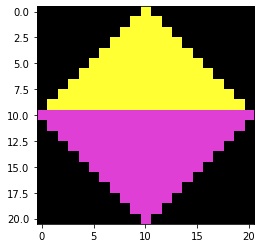

In [2]:
gradient = np.zeros((21, 21, 3), dtype=np.uint8)

#La funcion rango llega al limite superior menos 1
for x in range (0,10):
    for j in range (10-x,10+x+1):
         gradient[x, j] = [255, 255, 51]

#Se hace una resta en el gradiente para poder avanzar de abajo hacia arriba
for x in range (0,11):
    for j in range (10-x,10+x+1):
         gradient[20-x, j] = [224, 63, 214]


plt.imshow(gradient, cmap='gray')

#### Ejercicio 2 (15 puntos)

Crea el código para implementar un filtro gaussiano y aplicalo a la imagen **peppers.tiff**. **Nota: No uses las funciones filter2d de openCV.**

El filtro es el siguiente: ![GaussianBlur](images/gaussian_blur.png). 



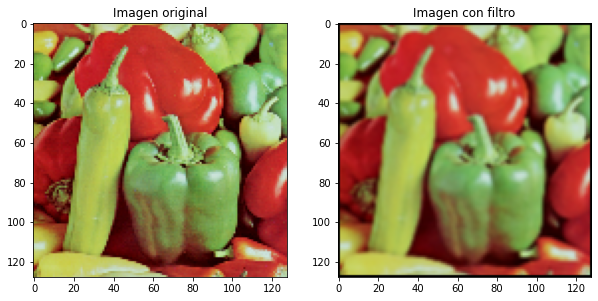

In [4]:
peppers = cv2.imread('images/peppers.tiff')
peppers = cv2.cvtColor(peppers, cv2.COLOR_BGR2RGB)
peppers = cv2.resize(peppers, (128,128))

filtro = np.array([[1/16, 2/16, 1/16], 
                   [2/16, 4/16, 2/16], 
                   [1/16, 2/16, 1/16]])

peppers_filtro = np.zeros((peppers.shape[1], peppers.shape[0], 3), dtype=np.uint8)


for x in range(1, peppers.shape[1]-1):
    for y in range(1, peppers.shape[0]-1):
        suma_rojos = 0
        suma_verdes = 0
        suma_azules = 0
        for i in range(-1, 2):
            for j in range(-1, 2):
                suma_rojos += filtro[i+1, j+1] * peppers[y+i, x+j][0]
                suma_verdes += filtro[i+1, j+1] * peppers[y+i, x+j][1]
                suma_azules += filtro[i+1, j+1] * peppers[y+i, x+j][2]
        peppers_filtro[y, x][0] = np.clip(suma_rojos, 0, 255)
        peppers_filtro[y, x][1]= np.clip(suma_verdes, 0, 255)
        peppers_filtro[y, x][2]= np.clip(suma_azules, 0, 255)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_title('Imagen original')
ax1.imshow(peppers, cmap='gray')

ax2.set_title('Imagen con filtro')
ax2.imshow(peppers_filtro, cmap='gray')
        


#### Ejercicio 3 (50 puntos)

Crea un pipeline de visión para segmentar los números de las placas de las imágenes que están en la carpeta **images/licene_plates**. Revisa las celdas siguientes para completar las partes que se solicitan. Además de las celdas con funciones predefinidas que tienes que completar, puedes agregar todas las celdas y funciones que consideres necesarias.

El resultado esperado es el siguiente:

![Expected output](images/license_plates/output2.png)

En el plot final, muestra tanto las imágenes originales, como los contornos solamente de la zona donde está la placa.

Las imágenes se pueden ver en la siguiente celda:

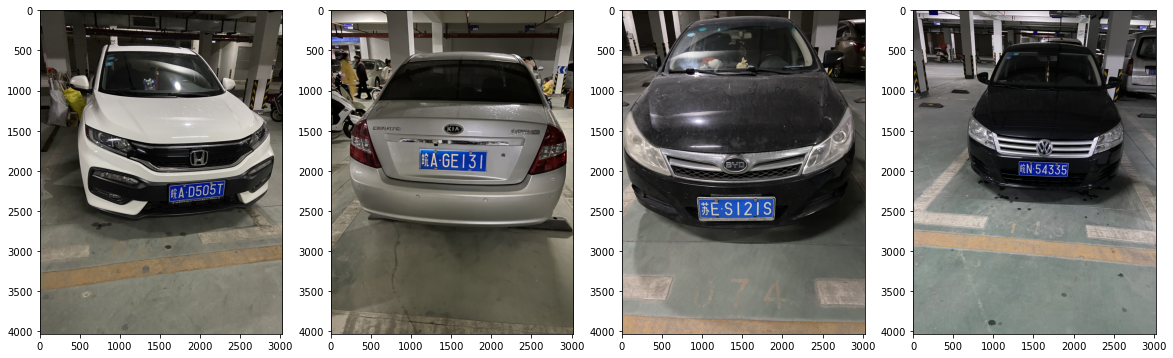

In [7]:
images = []

for i in range(1, 5):
    image = cv2.imread(f'{image_dir}/0{i}.jpeg')
    images.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

f, subplots = plt.subplots(1,4, figsize=(20,10))

for i in range(4):
    subplots[i].imshow(images[i])

**Define una función con el preprocesamiento que consideras necesario aplicar a todas las imágenes** 

In [15]:
lower_blue = np.array([0, 0, 100])
upper_blue = np.array([40, 110, 230])

def preprocess(image):
    image = cv2.resize(image,(700,1100))
    mask = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if (image[x,y,0]>lower_blue[0]and image[x,y,0]<=upper_blue[0] and image[x,y,1] >lower_blue[1]and image[x,y,1]<=upper_blue[1] and image[x,y,2]>lower_blue[2]and image[x,y,2]<upper_blue[2]):
                mask[x,y,0]=255
                mask[x,y,1]=255
                mask[x,y,2]=255

    return mask

**Muestra una figura con el preprocesamiento que aplicaste a las imágenes**

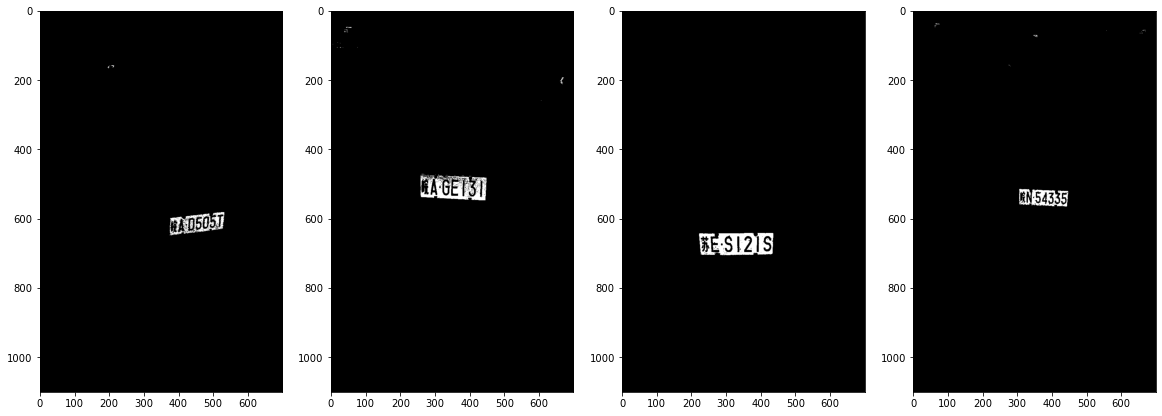

In [16]:
imagenesPreprocesadas = []
f1, subplots = plt.subplots(1, 4, figsize=(20,10))

for i in range(4):
    
    imagenesPreprocesadas.append(preprocess(images[i]))
    subplots[i].imshow(imagenesPreprocesadas[i])

**Crea el código necesario para aplicar el procesamiento a las imágenes. El objetivo es obtener los bordes de los números de las placas** 

En este procesamiento se recorta el área de interés

In [17]:
## Agrega el código necesario para procesar las imágenes
def process(image):
    coordenadasBlancasX = []
    coordenadasBlancasY = []
    sub_image = image[300:900,:]

    for i in range(0,sub_image.shape[0]):
        for j in range(0,sub_image.shape[1]):
            if(sub_image[i,j,0]==255 and sub_image[i,j,1]==255 and sub_image[i,j,2]==255):
                coordenadasBlancasX.append(i)
                coordenadasBlancasY.append(j)  
    coordenadasBlancasX = np.sort(coordenadasBlancasX)
    coordenadasBlancasY = np.sort(coordenadasBlancasY)
    return sub_image[coordenadasBlancasX[0]:coordenadasBlancasX[len(coordenadasBlancasX)-1],coordenadasBlancasY[0]:coordenadasBlancasY[len(coordenadasBlancasY)-1]]
    

**Completa la siguiente función: El parámetro es una de las imágenes en escala de grises o blanco y negro, y el resultado es una sub-imagen que representa solamente el área de la placa**

In [412]:
def roi(image):
    height, width = image.shape
    min_x = width
    max_x = 0
    min_y = height
    max_y = 0

    return image[min_y:max_y, min_x:max_x]

In [18]:
kernel = np.ones((3,3), np.uint8)
edges_images = [process(imagenesPreprocesadas[0]), process(imagenesPreprocesadas[1]), process(imagenesPreprocesadas[2]), process(imagenesPreprocesadas[3])]
for i in range(len(edges_images)):
    closing = cv2.morphologyEx(edges_images[i], cv2.MORPH_CLOSE, kernel)
    edges = cv2.Canny(closing, 180, 240)
    edges_images[i] = edges

**Crea el código necesario para mostar una figura con las imágenes originales en la primer fila, y con el contorno de los números de las placas en la segunda fila**

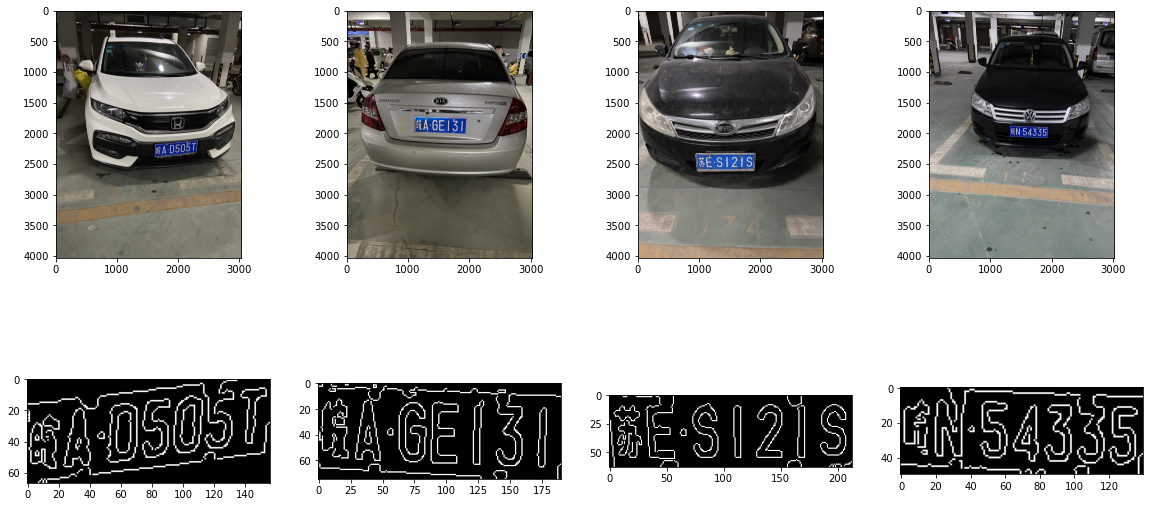

In [19]:
f3, ((ax31, ax32, ax33, ax34), (ax35, ax36, ax37, ax38)) = plt.subplots(2, 4, figsize=(20,10))
ax31.imshow(images[0], cmap="gray")
ax32.imshow(images[1], cmap="gray")
ax33.imshow(images[2], cmap="gray")
ax34.imshow(images[3], cmap="gray")

ax35.imshow(edges_images[0], cmap="gray")
ax36.imshow(edges_images[1], cmap="gray")
ax37.imshow(edges_images[2], cmap="gray")
ax38.imshow(edges_images[3], cmap="gray")